In [112]:
from pymongo import MongoClient
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import statistics

In [3]:
#mongodb config
client = MongoClient('localhost', 27017)
db = client['typeaidata']
collection = db['typist1']

In [4]:
# Get typed data
query = {'corrections': {'$gt': 0}, 'text':{'$ne': ''}}
projection = {'corrections':1, 'text':1, 'typedlist':1, '_id':0}
query = collection.find(query, projection)
df =  pd.DataFrame(list(query))
df

,corrections,text,typedlist
0,1,Perhaps if you know you are insane then you ar...,"[, P, e, r, h, a, p, s, , i, f, , y, o, u, ..."
1,8,Perhaps if you know you are insane then you ar...,"[, P, e, r, h, a, p, s, , i, f, , y, o, u, ..."
2,2,Perhaps if you know you are insane then you ar...,"[, P, e, r, h, a, p, s, , i, f, , y, o, u, ..."
3,3,Perhaps if you know you are insane then you ar...,"[, P, e, r, h, a, p, s, , i, f, , y, o, u, ..."
4,5,jit hit fit dit wit lit litter jit hit fit wit...,"[j, i, t, , h, i, t, , f, i, t, , d, i, t, ..."
5,20,Perhaps if you know you are insane then you ar...,"[, P, E, r, h, a, p, s, , i, f, , y, o, u, ..."
6,6,I can fly like an eagle and strike like a hawk.,"[, I, , c, a, n, , f, l, y, , l, i, k, e, ..."
7,6,There will come a time when all of us are dead.,"[, , , T, h, e, r, , w, i, l, l, , , , , ..."
8,1,There will come a time when all of us are dead.,"[, , , T, h, e, r, e, , w, i, l, l, , c, o, ..."
9,1,The quick brown fox jumps over the lazy dog.,"[, T, h, e, , q, u, i, c, k, , b, r, o, w, n..."


In [5]:
# Check for text
for i in range(len(df)):
    x = df['text'][i].split()
    st =  ' '.join(x)
    print('\n',st)


 Perhaps if you know you are insane then you are not insane.

 Perhaps if you know you are insane then you are not insane.

 Perhaps if you know you are insane then you are not insane.

 Perhaps if you know you are insane then you are not insane.

 jit hit fit dit wit lit litter jit hit fit wit lit litter jit hit fit dit wit lit litter

 Perhaps if you know you are insane then you are not insane.

 I can fly like an eagle and strike like a hawk.

 There will come a time when all of us are dead.

 There will come a time when all of us are dead.

 The quick brown fox jumps over the lazy dog.

 There will come a time when all of us are dead.

 I can fly like an eagle and strike like a hawk.

 ffff dddd ssss aaaa ffff dddd ssss aaaa ffff dddd ssss aaaa

 Perhaps if you know you are insane then you are not insane.

 Perhaps if you know you are insane then you are not insane.

 I'm not a big fat panda. I'm THE big fat panda.

 I can fly like an eagle and strike like a hawk.

 Perhaps if you

In [6]:
# Check for typed text
for i in range(len(df)):
    x = ''.join(df['typedlist'][i]).split()
    st =  ' '.join(x)
    print('\n',st)


 Perhaps if you nknow you are insane then you are not insane.

 Perhaps if you knwo ow you are insane then you ae notre not insane.

 Perhaps if you know you are insane then you are not siinsane.

 Perhaps if you know you raeare insane then you are not insane.

 jit hit fit dit wit lit ilitter jit hit fit wit litl  litter lijit hit fit dit wit lit litter

 PErhaps if you know Perhaps if you know you are insane then you are not insane.

 I can fly like an eagle and striuke ke i like a hawk.

 Ther will e will come a time when all of us are dead.

 There will come a time when all of us dare dead.

 The quick brown fox kjumps over the lazy dog.

 There will come a time when al l of us are dead.

 Ic  can fly like an eagle and strike alike hwawhawk.a hawk.

 ffff dddd ssss aaaa ffff dddd sssssss aaaa ffff dddd ssss aaaa

 Pehrerhaps if you know you are insane thenm you  you are not insane.

 Perhaps if you know

In [7]:
# Clean column text and typedlist in typist data
rows = len(df)
for i in range(rows):
    df.text[i] = ' '.join(df.text[i].split())
    c = df.text[i][0]
    pos = 0
    while((df.typedlist[i][pos:])[0] != c):
        pos = pos + 1
    df.typedlist[i] = df.typedlist[i][pos:]
df

C:\Users\Hopeless\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Hopeless\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,corrections,text,typedlist
0,1,Perhaps if you know you are insane then you ar...,"[P, e, r, h, a, p, s, , i, f, , y, o, u, , ..."
1,8,Perhaps if you know you are insane then you ar...,"[P, e, r, h, a, p, s, , i, f, , y, o, u, , ..."
2,2,Perhaps if you know you are insane then you ar...,"[P, e, r, h, a, p, s, , i, f, , y, o, u, , ..."
3,3,Perhaps if you know you are insane then you ar...,"[P, e, r, h, a, p, s, , i, f, , y, o, u, , ..."
4,5,jit hit fit dit wit lit litter jit hit fit wit...,"[j, i, t, , h, i, t, , f, i, t, , d, i, t, ..."
5,20,Perhaps if you know you are insane then you ar...,"[P, E, r, h, a, p, s, , i, f, , y, o, u, , ..."
6,6,I can fly like an eagle and strike like a hawk.,"[I, , c, a, n, , f, l, y, , l, i, k, e, , ..."
7,6,There will come a time when all of us are dead.,"[T, h, e, r, , w, i, l, l, , , , , , , ..."
8,1,There will come a time when all of us are dead.,"[T, h, e, r, e, , w, i, l, l, , c, o, m, e, ..."
9,1,The quick brown fox jumps over the lazy dog.,"[T, h, e, , q, u, i, c, k, , b, r, o, w, n, ..."


In [8]:
# Preprocess cleaned column typedlist
df['typed'] = ''
for i in range(rows):
    temp = (''.join(df['typedlist'][i])).split()
    df['typed'][i] =  ' '.join(temp)
del df['typedlist']
df

C:\Users\Hopeless\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,corrections,text,typed
0,1,Perhaps if you know you are insane then you ar...,Perhaps if you nknow you are insane then you ...
1,8,Perhaps if you know you are insane then you ar...,Perhaps if you knwo ow you are insane then ...
2,2,Perhaps if you know you are insane then you ar...,Perhaps if you know you are insane then you ar...
3,3,Perhaps if you know you are insane then you ar...,Perhaps if you know you raeare insane then ...
4,5,jit hit fit dit wit lit litter jit hit fit wit...,jit hit fit dit wit lit ilitter jit hit fit w...
5,20,Perhaps if you know you are insane then you ar...,PErhaps if you know Perhap...
6,6,I can fly like an eagle and strike like a hawk.,I can fly like an eagle and striuke ke i...
7,6,There will come a time when all of us are dead.,Ther will e will come a time when all of...
8,1,There will come a time when all of us are dead.,There will come a time when all of us dare dead.
9,1,The quick brown fox jumps over the lazy dog.,The quick brown fox kjumps over the lazy dog.


In [13]:
df.text[1]

'Perhaps if you know you are insane then you are not insane.'

In [30]:
df.typed[1]

'Perhaps if you knwo \x08\x08\x08ow you are insane then you ae not\x08\x08\x08\x08\x08re not insane.'

In [92]:
# Generate a list of incorrect words with their frequency

bag = []
count = []

for i in range(rows):
    txt = df.text[i]
    typ = df.typed[i]
    words = txt.split()
    words2 = txt.split()
    counter = 0
    j = 0
    k = 0
    temp = ''
    while(j < len(words) and k < len(typ)):
        c = typ[k]
        if(c=='\x08' or c=='\r' or c=='\x01'):
            temp = temp[:-1]
            counter += 1
        else:
            temp = temp + str(c)
        if(temp.strip() == words[j]):
            bag.append(words[j])
            count.append(counter)
            temp = ''
            j+=1
            counter = 0
        k += 1

In [93]:
list(zip(bag, count))

[('Perhaps', 0),
 ('if', 0),
 ('you', 0),
 ('know', 1),
 ('you', 0),
 ('are', 0),
 ('insane', 0),
 ('then', 0),
 ('you', 0),
 ('are', 0),
 ('not', 0),
 ('insane.', 0),
 ('Perhaps', 0),
 ('if', 0),
 ('you', 0),
 ('know', 3),
 ('you', 0),
 ('are', 0),
 ('insane', 0),
 ('then', 0),
 ('you', 0),
 ('are', 5),
 ('not', 0),
 ('insane.', 0),
 ('Perhaps', 0),
 ('if', 0),
 ('you', 0),
 ('know', 0),
 ('you', 0),
 ('are', 0),
 ('insane', 0),
 ('then', 0),
 ('you', 0),
 ('are', 0),
 ('not', 0),
 ('insane.', 2),
 ('Perhaps', 0),
 ('if', 0),
 ('you', 0),
 ('know', 0),
 ('you', 0),
 ('are', 3),
 ('insane', 0),
 ('then', 0),
 ('you', 0),
 ('are', 0),
 ('not', 0),
 ('insane.', 0),
 ('jit', 0),
 ('hit', 0),
 ('fit', 0),
 ('dit', 0),
 ('wit', 0),
 ('lit', 0),
 ('litter', 1),
 ('jit', 0),
 ('hit', 0),
 ('fit', 0),
 ('wit', 0),
 ('lit', 0),
 ('litter', 2),
 ('jit', 2),
 ('hit', 0),
 ('fit', 0),
 ('dit', 0),
 ('wit', 0),
 ('lit', 0),
 ('litter', 0),
 ('Perhaps', 20),
 ('if', 0),
 ('you', 0),
 ('know', 0),
 (

In [ ]:
# Graph of bag vs count

In [125]:
# Normalizing the count of incorrect words (method 1)
diff = float(max(count) - min(count))
count_normalized = [int(round((i/diff)*5))+1 for i in count]
list(zip(bag, count_normalized))

[('Perhaps', 1),
 ('if', 1),
 ('you', 1),
 ('know', 1),
 ('you', 1),
 ('are', 1),
 ('insane', 1),
 ('then', 1),
 ('you', 1),
 ('are', 1),
 ('not', 1),
 ('insane.', 1),
 ('Perhaps', 1),
 ('if', 1),
 ('you', 1),
 ('know', 2),
 ('you', 1),
 ('are', 1),
 ('insane', 1),
 ('then', 1),
 ('you', 1),
 ('are', 2),
 ('not', 1),
 ('insane.', 1),
 ('Perhaps', 1),
 ('if', 1),
 ('you', 1),
 ('know', 1),
 ('you', 1),
 ('are', 1),
 ('insane', 1),
 ('then', 1),
 ('you', 1),
 ('are', 1),
 ('not', 1),
 ('insane.', 1),
 ('Perhaps', 1),
 ('if', 1),
 ('you', 1),
 ('know', 1),
 ('you', 1),
 ('are', 2),
 ('insane', 1),
 ('then', 1),
 ('you', 1),
 ('are', 1),
 ('not', 1),
 ('insane.', 1),
 ('jit', 1),
 ('hit', 1),
 ('fit', 1),
 ('dit', 1),
 ('wit', 1),
 ('lit', 1),
 ('litter', 1),
 ('jit', 1),
 ('hit', 1),
 ('fit', 1),
 ('wit', 1),
 ('lit', 1),
 ('litter', 1),
 ('jit', 1),
 ('hit', 1),
 ('fit', 1),
 ('dit', 1),
 ('wit', 1),
 ('lit', 1),
 ('litter', 1),
 ('Perhaps', 6),
 ('if', 1),
 ('you', 1),
 ('know', 1),
 ('

In [ ]:
# Graph of bag vs normalized count

In [126]:
# Generate curated text for obtaining the training data (for method 1)
with open('curated_v1.txt', 'w') as f:
    for temp in zip(bag, count_normalized):
        lst = [temp[0]] * temp[1]
        st = ' '.join(lst)
        f.write(st + ' ')

In [102]:
# Calculate the mode of the words
incorrect_count = []
for i in count:
    if(i>0):
        incorrect_count.append(i)
temp = Counter(incorrect_count)
mode = temp.most_common()
mode

[(1, 40),
 (2, 29),
 (3, 19),
 (4, 11),
 (5, 4),
 (6, 4),
 (10, 4),
 (8, 3),
 (20, 1),
 (7, 1),
 (9, 1)]

In [124]:
# Graph of mode data (Incorrections vs Words)


In [108]:
# Z-score Calculation
mean = sum(count)/len(count)
std = statistics.stdev(count)
zscore = [(i-mean)/std for i in count]
zscore

[-0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 0.3990313053542077,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 1.7745949191701895,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 3.1501585329861714,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 1.0868131122621987,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 -0.28875050155378323,
 1.7745949191701895,
 -0.28875050155378323,
 -0.28875050155378323

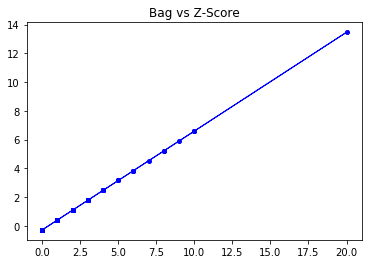

In [122]:
# Graph of bag vs zscore
plt.figure()
plt.title('Bag vs Z-Score')
plt.plot(count, zscore, color='blue', marker='o', linestyle='-', linewidth=1, markersize=4)
plt.show()

In [127]:
# Normalizing the count of incorrect words (method 2)
diff = float(max(zscore) - min(zscore))
count_normalized = [int(round((i/diff)*5))+1 for i in zscore]
list(zip(bag, count_normalized))

[('Perhaps', 1),
 ('if', 1),
 ('you', 1),
 ('know', 1),
 ('you', 1),
 ('are', 1),
 ('insane', 1),
 ('then', 1),
 ('you', 1),
 ('are', 1),
 ('not', 1),
 ('insane.', 1),
 ('Perhaps', 1),
 ('if', 1),
 ('you', 1),
 ('know', 2),
 ('you', 1),
 ('are', 1),
 ('insane', 1),
 ('then', 1),
 ('you', 1),
 ('are', 2),
 ('not', 1),
 ('insane.', 1),
 ('Perhaps', 1),
 ('if', 1),
 ('you', 1),
 ('know', 1),
 ('you', 1),
 ('are', 1),
 ('insane', 1),
 ('then', 1),
 ('you', 1),
 ('are', 1),
 ('not', 1),
 ('insane.', 1),
 ('Perhaps', 1),
 ('if', 1),
 ('you', 1),
 ('know', 1),
 ('you', 1),
 ('are', 2),
 ('insane', 1),
 ('then', 1),
 ('you', 1),
 ('are', 1),
 ('not', 1),
 ('insane.', 1),
 ('jit', 1),
 ('hit', 1),
 ('fit', 1),
 ('dit', 1),
 ('wit', 1),
 ('lit', 1),
 ('litter', 1),
 ('jit', 1),
 ('hit', 1),
 ('fit', 1),
 ('wit', 1),
 ('lit', 1),
 ('litter', 1),
 ('jit', 1),
 ('hit', 1),
 ('fit', 1),
 ('dit', 1),
 ('wit', 1),
 ('lit', 1),
 ('litter', 1),
 ('Perhaps', 6),
 ('if', 1),
 ('you', 1),
 ('know', 1),
 ('

In [128]:
# Normalizing the count of incorrect words (method 2)
with open('curated_v2.txt', 'w') as f:
    for temp in zip(bag, count_normalized):
        lst = [temp[0]] * temp[1]
        st = ' '.join(lst)
        f.write(st + ' ')

In [ ]:
# End-of-file